# Part 1

In [1]:
import numpy as np
import pandas as pd
auto=pd.read_csv('projectdata.csv')

/tmp/ipykernel_35/2778149167.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
auto.shape

(398, 9)

In [4]:
auto.info()
#no data seems to be missing as all columns have the same number of rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
auto.loc[auto['horsepower']=='?','horsepower']=np.nan
auto[auto['horsepower'].astype(str).str.endswith('?')]
auto['horsepower']=auto['horsepower'].astype(float)

In [6]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [7]:
auto['horsepower'].fillna(auto['horsepower'].mean(), inplace=True)

/tmp/ipykernel_35/1152127115.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  auto['horsepower'].fillna(auto['horsepower'].mean(), inplace=True)


In [8]:
auto.drop(['origin'], axis=1, inplace=True)
auto.drop(['car_name'], axis=1, inplace=True)
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [9]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='model_year', ylabel='Count'>

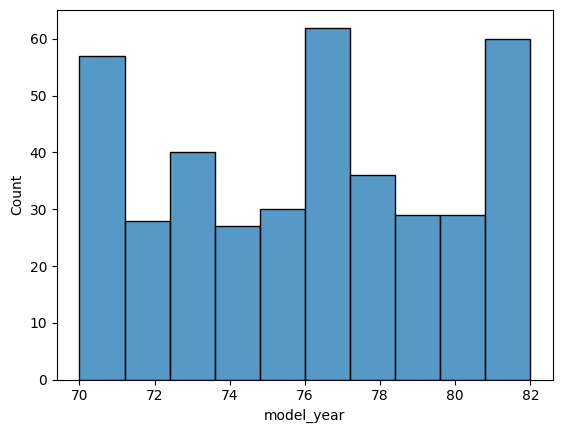

In [11]:
sns.histplot(data=auto['model_year'])

<Axes: xlabel='cylinders', ylabel='Count'>

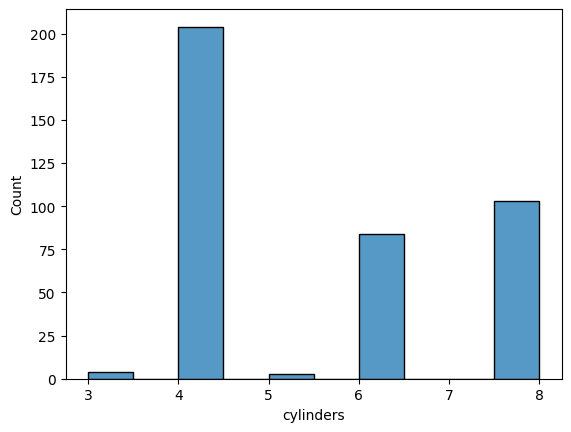

In [12]:
sns.histplot(data=auto['cylinders'])

<Axes: xlabel='model_year'>

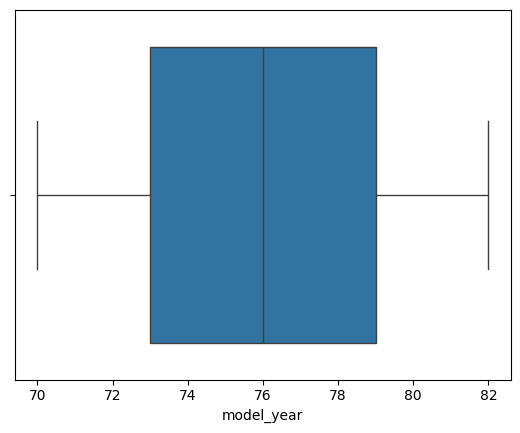

In [13]:
sns.boxplot(data=auto, x='model_year')

<Axes: xlabel='horsepower'>

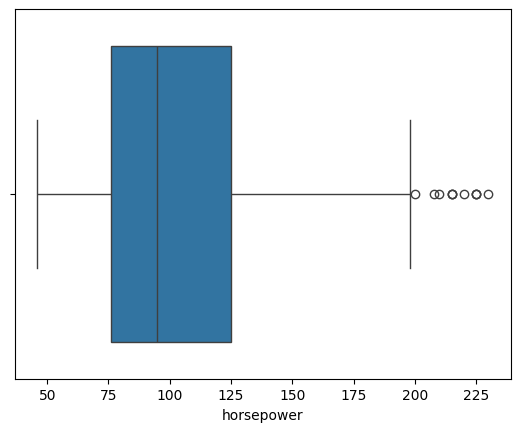

In [14]:
sns.boxplot(data=auto, x='horsepower')

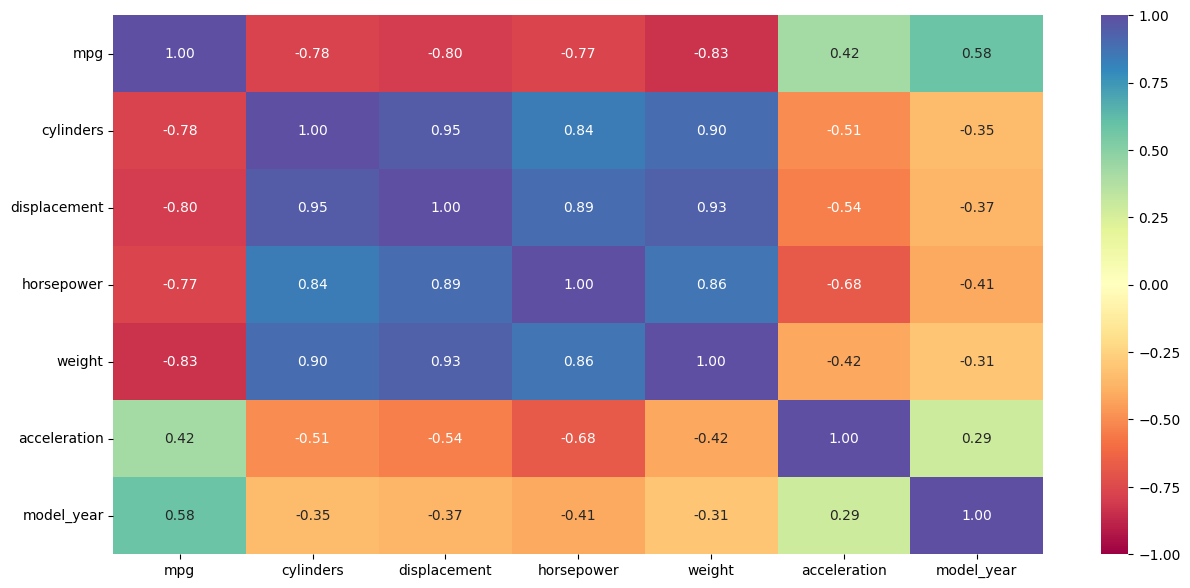

In [15]:
corr_cols=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year']

# increate the figure size
plt.figure(figsize=(15, 7))

# the actual heat map
sns.heatmap(
   auto[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

# show the plot
plt.show()

# Part 2

In [32]:
import sklearn
import sklearn.linear_model
from sklearn.model_selection import train_test_split
X = auto.drop(['mpg'],axis=1)
y = auto['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [33]:
import sklearn.linear_model
lr = sklearn.linear_model.LinearRegression()

In [34]:
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
X_train.shape

(199, 6)

In [38]:
X_test.shape

(199, 6)

In [42]:
lr.predict(X_test.iloc[:199])

array([22.01422907, 26.16440519, 19.47913022, 25.69506111, 24.11781695,
       14.97018301, 28.8759791 , 33.59050794, 16.17764492, 10.64099794,
       31.32832832, 16.46461713, 22.30391381, 26.55267662, 35.53318965,
       22.72979646, 10.03422179, 20.94977277,  8.12685444, 32.53934703,
       25.93816323, 31.12169793, 21.51438289, 25.26551038, 27.15289928,
       28.76382246, 31.62410143, 31.91820042, 14.92989699, 30.93677554,
       28.04377764, 10.17168796, 20.85287901, 27.84142782, 26.17467834,
       13.55374101, 28.57057452,  8.47484204, 32.35465389, 25.28488635,
       26.36818813, 25.93475639, 20.11578158, 32.36836086, 26.98225736,
       22.26599727, 21.07066816, 11.34463731, 28.1416034 , 19.11860041,
       24.5077392 , 27.93469994, 15.83680895, 11.57496434, 30.38895482,
       25.26647439,  9.64927174, 12.47176664, 30.19634361, 34.67977093,
       34.79361327, 34.7796814 , 17.47798648, 28.24663028, 19.20781522,
       31.95474859, 27.5091301 , 26.62181292, 30.77948487, 12.32

In [41]:
lr.predict(X_train.iloc[:199])

array([16.54613607, 21.61593136, 34.40710933, 25.43804955, 30.77463401,
        7.16571257, 24.68802339, 27.87707036, 19.89313175, 26.61589011,
       28.91873143, 18.60110033, 34.5818189 , 22.0180898 , 31.24934784,
       21.90914882, 31.45756679, 17.44568185, 32.34336201, 11.09962787,
       12.59528463, 19.88273997, 24.2437417 , 20.92262325, 15.06110012,
       34.83713016, 30.17942525, 15.86039801, 33.94381128, 29.11000355,
       32.47414851, 19.93644054, 26.13259685, 25.39061086, 33.61351938,
       17.71237683, 24.00825395, 24.52986536, 29.02591035, 31.18824633,
       11.60554113, 22.4605893 , 21.54480293, 22.35976233, 10.22111757,
       28.08627227, 18.98431266, 23.11738224, 10.07448564, 20.95150074,
       32.64977005, 14.35347443, 26.38192254, 29.0715504 , 18.03288821,
       30.61533628, 12.58405021, 13.71315794, 26.97250352, 31.13508254,
       24.31609607, 15.43419034, 29.76845703, 27.21834528, 27.70347375,
       32.5544109 , 20.83702766, 30.87507557, 20.38041718, 25.97

In [43]:
lr.score(X_test, y_test)

0.8153734105599775

In [44]:
lr.score(X_train, y_train)

0.7998424107647886